<a href="https://colab.research.google.com/github/Hrimax/House-price-predictor-/blob/main/Copy_of_Untitled11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
!wget 'https://raw.githubusercontent.com/googlecreativelab/quickdraw-dataset/master/categories.txt'

--2021-12-29 10:05:00--  https://raw.githubusercontent.com/googlecreativelab/quickdraw-dataset/master/categories.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2791 (2.7K) [text/plain]
Saving to: ‘categories.txt.1’

categories.txt.1    100%[===================>]   2.73K  --.-KB/s    in 0s      

2021-12-29 10:05:00 (32.8 MB/s) - ‘categories.txt.1’ saved [2791/2791]



In [66]:
f = open("categories.txt","r")
# And for reading use
classes = f.readlines()
f.close()

In [67]:
classes = [c.replace('\n','').replace(' ','_') for c in classes]

In [68]:
!mkdir data

mkdir: cannot create directory ‘data’: File exists


In [69]:
import urllib.request
def download():
    base = 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/'
    for c in classes:        
        cls_url = c.replace('_', '%20')
        path = base+cls_url+'.npy'
        print(path)
        urllib.request.urlretrieve(path, 'data/'+c+'.npy')

In [ ]:
download()

https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/aircraft%20carrier.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/airplane.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/alarm%20clock.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/ambulance.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/angel.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/animal%20migration.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/ant.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/anvil.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/apple.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/arm.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/asparagus.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/axe.npy
https://storage.googleapis.com/quickd

In [9]:
import os
import glob
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow.python.keras import layers
from tensorflow import keras 
import tensorflow as tf
from PIL import Image
from numpy import asarray

print(len(os.listdir('data')))

100


In [10]:
def load_data(root, vfold_ratio=0.2, max_items_per_class= 100 ):
    all_files = glob.glob(os.path.join(root, '*.npy'))

    #initialize variables 
    x = np.empty([0, 784])
    y = np.empty([0])
    class_names = []

    #load each data file 
    for idx, file in enumerate(all_files):
        data = np.load(file)
        data = data[0: max_items_per_class, :]
        labels = np.full(data.shape[0], idx)

        x = np.concatenate((x, data), axis=0)
        y = np.append(y, labels)

        class_name, ext = os.path.splitext(os.path.basename(file))
        class_names.append(class_name)

    data = None
    labels = None
    
    #randomize the dataset 
    permutation = np.random.permutation(y.shape[0])
    x = x[permutation, :]
    y = y[permutation]

    #separate into training and testing 
    vfold_size = int(x.shape[0]/100*(vfold_ratio*100))

    x_test = x[0:vfold_size, :]
    y_test = y[0:vfold_size]

    x_train = x[vfold_size:x.shape[0], :]
    y_train = y[vfold_size:y.shape[0]]
    return x_train, y_train, x_test, y_test, class_names

In [11]:
x_train, y_train, x_test, y_test, class_names = load_data('data')
num_classes = len(class_names)
image_size = 28

In [12]:
print(len(x_train))

320000


bridge


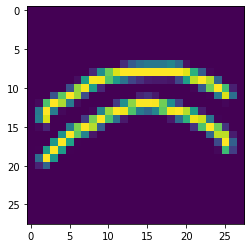

In [13]:
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline  
idx = randint(0, len(x_train))
plt.imshow(x_train[idx].reshape(28,28)) 
print(class_names[int(y_train[idx].item())])

In [14]:
# Reshape and normalize
x_train = x_train.reshape(x_train.shape[0], image_size, image_size, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], image_size, image_size, 1).astype('float32')

x_train /= 255.0
x_test /= 255.0

# Convert class vectors to class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [48]:
model = keras.Sequential()
model.add(layers.Convolution2D(16, (3, 3),
                        padding='same',
                        input_shape=x_train.shape[1:], activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Convolution2D(32, (3, 3), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Convolution2D(64, (3, 3), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size =(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(100, activation='softmax')) 

# Train model
adam = tf.optimizers.Adam()
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['top_k_categorical_accuracy'])



In [49]:
model.fit(x = x_train, y = y_train, validation_split=0.1, batch_size = 256, verbose=2, epochs=5)


Epoch 1/5
1125/1125 - 14s - loss: 1.8910 - top_k_categorical_accuracy: 0.7859 - val_loss: 1.3344 - val_top_k_categorical_accuracy: 0.8833 - 14s/epoch - 13ms/step
Epoch 2/5
1125/1125 - 13s - loss: 1.2077 - top_k_categorical_accuracy: 0.8966 - val_loss: 1.1228 - val_top_k_categorical_accuracy: 0.9071 - 13s/epoch - 12ms/step
Epoch 3/5
1125/1125 - 13s - loss: 1.0549 - top_k_categorical_accuracy: 0.9132 - val_loss: 1.0152 - val_top_k_categorical_accuracy: 0.9174 - 13s/epoch - 12ms/step
Epoch 4/5
1125/1125 - 13s - loss: 0.9718 - top_k_categorical_accuracy: 0.9215 - val_loss: 0.9779 - val_top_k_categorical_accuracy: 0.9219 - 13s/epoch - 12ms/step
Epoch 5/5
1125/1125 - 13s - loss: 0.9135 - top_k_categorical_accuracy: 0.9275 - val_loss: 0.9319 - val_top_k_categorical_accuracy: 0.9250 - 13s/epoch - 12ms/step


In [50]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuarcy: {:0.2f}%'.format(score[1] * 100))

Test accuarcy: 92.34%


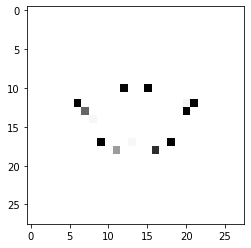

In [62]:
import cv2
from keras.preprocessing import image
test_img = image.load_img("star.jpg",target_size=(28,28))
plt.imshow(test_img)
test_img = image.img_to_array(test_img)


test_img = test_img[:,:,1].reshape(1,28,28,1)
test_img = test_img/255



In [60]:
pred = model.predict(test_img)[0]
ind = (-pred).argsort()[:5]
latex = [class_names[x] for x in ind]
print(latex)

['tree', 'microphone', 'frying_pan', 'tennis_racquet', 'lollipop']


In [54]:
with open('class_names.txt', 'w') as file_handler:
    for item in class_names:
        file_handler.write("{}\n".format(item))

In [55]:
!pip install tensorflowjs 

In [56]:
model.save('keras.h5')

NotImplementedError: ignored

In [32]:
!mkdir model
!tensorflowjs_converter --input_format keras keras.h5 model/

Traceback (most recent call last):
  File "/usr/local/bin/tensorflowjs_converter", line 8, in <module>
    sys.exit(pip_main())
  File "/usr/local/lib/python3.7/dist-packages/tensorflowjs/converters/converter.py", line 813, in pip_main
    main([' '.join(sys.argv[1:])])
  File "/usr/local/lib/python3.7/dist-packages/tensorflowjs/converters/converter.py", line 817, in main
    convert(argv[0].split(' '))
  File "/usr/local/lib/python3.7/dist-packages/tensorflowjs/converters/converter.py", line 804, in convert
    weight_shard_size_bytes, metadata_map)
  File "/usr/local/lib/python3.7/dist-packages/tensorflowjs/converters/converter.py", line 501, in _dispatch_converter
    metadata=metadata_map)
  File "/usr/local/lib/python3.7/dist-packages/tensorflowjs/converters/converter.py", line 89, in dispatch_keras_h5_to_tfjs_layers_model_conversion
    h5_file, split_by_layer=split_weights_by_layer)
  File "/usr/local/lib/python3.7/dist-packages/tensorflowjs/converters/keras_h5_conversion.py", l

In [33]:
!cp class_names.txt model/class_names.txt

In [ ]:
!zip -r model.zip model 

In [ ]:
from google.colab import files
files.download('model.zip')